In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_pubcov_CA'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_CA_2018_Public_Coverage'
EXPERIMENT_SESSION_UUID = 'c42fae24-694f-408e-98df-ce099940a961'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(912, 35)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,0,OK,2023-08-01 23:13:20.469,...,0.690741,1.000000,0.000000,0.713777,1.000000,0.000000,0.686930,1.000000,0.000000,0.702000
1,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,1,OK,2023-08-01 23:13:20.481,...,0.710185,1.000000,0.000000,0.695962,1.000000,0.000000,0.694529,1.000000,0.000000,0.695333
2,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,2,OK,2023-08-01 23:13:20.493,...,0.761111,1.000000,0.000000,0.769596,1.000000,0.000000,0.768997,1.000000,0.000000,0.769333
3,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:13:20.505,...,0.762963,1.000000,0.000000,0.749406,1.000000,0.000000,0.764438,1.000000,0.000000,0.756000
4,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,0,OK,2023-08-01 23:06:10.855,...,0.700000,1.000000,0.000000,0.717340,1.000000,0.000000,0.694529,1.000000,0.000000,0.707333
5,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,1,OK,2023-08-01 23:06:10.870,...,0.715741,1.000000,0.000000,0.703088,1.000000,0.000000,0.699088,1.000000,0.000000,0.701333
6,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,2,OK,2023-08-01 23:06:10.882,...,0.760185,1.000000,0.000000,0.762470,1.000000,0.000000,0.767477,1.000000,0.000000,0.764667
7,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.895,...,0.778704,1.000000,0.000000,0.770784,1.000000,0.000000,0.775076,1.000000,0.000000,0.772667
192,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,0,OK,2023-08-01 23:13:20.469,...,0.797102,0.768632,0.860692,0.793320,0.762531,0.870101,0.806560,0.781968,0.860520,0.799128
193,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Folktables_CA_2018_Public_Coverage,200,1,OK,2023-08-01 23:13:20.481,...,0.788736,0.755179,0.870968,0.797543,0.768255,0.864585,0.791810,0.754602,0.876410,0.795028


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
27,Accuracy,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.792593,1.000000,0.000000,0.769596,1.000000,0.000000,0.802432,1.000000,0.000000,0.784000
219,Aleatoric_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.806481,0.783489,0.894345,0.802919,0.778123,0.885743,0.814297,0.794008,0.896705,0.807911
411,F1,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.527426,1.000000,0.000000,0.469945,1.000000,0.000000,0.535714,1.000000,0.000000,0.498452
603,FNR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.404762,0.000000,1.000000,0.441558,0.000000,1.000000,0.427481,0.000000,1.000000,0.435088
795,FPR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.159770,0.000000,1.000000,0.183140,0.000000,1.000000,0.140417,0.000000,1.000000,0.164609
987,IQR,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.092896,0.089836,0.104587,0.092736,0.089339,0.104081,0.094011,0.091600,0.103805,0.093295
1179,Jitter,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.118618,0.091575,0.221960,0.121268,0.094682,0.210070,0.117543,0.092705,0.218425,0.119634
1371,Label_Stability,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.832370,0.873727,0.674330,0.826936,0.868981,0.686495,0.835729,0.871932,0.688692,0.830793
1563,Mean,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.620273,0.655028,0.487457,0.626737,0.663070,0.505376,0.620743,0.653165,0.489062,0.624108
1755,Overall_Uncertainty,101,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_CA_2018_Public_Coverage,200,3,OK,2023-08-01 23:06:10.999,...,0.824248,0.800794,0.913876,0.820707,0.795373,0.905329,0.832220,0.811653,0.915755,0.825757


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.014078,-0.105211,-0.115238,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.042722,-0.002147,0.017041,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,0.014078,0.105211,0.115238,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,1.210320,0.949101,1.028788,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,0.239219,-0.066005,0.036190,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,-0.032835,-0.015308,-0.030688,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,0.989478,0.983414,0.993233,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,-0.001275,0.002659,0.001428,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,-0.001034,0.001960,0.000743,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,0.984968,1.029145,1.010931,RandomForestClassifier,Exp_iter_1,0.0,3


## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [15]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

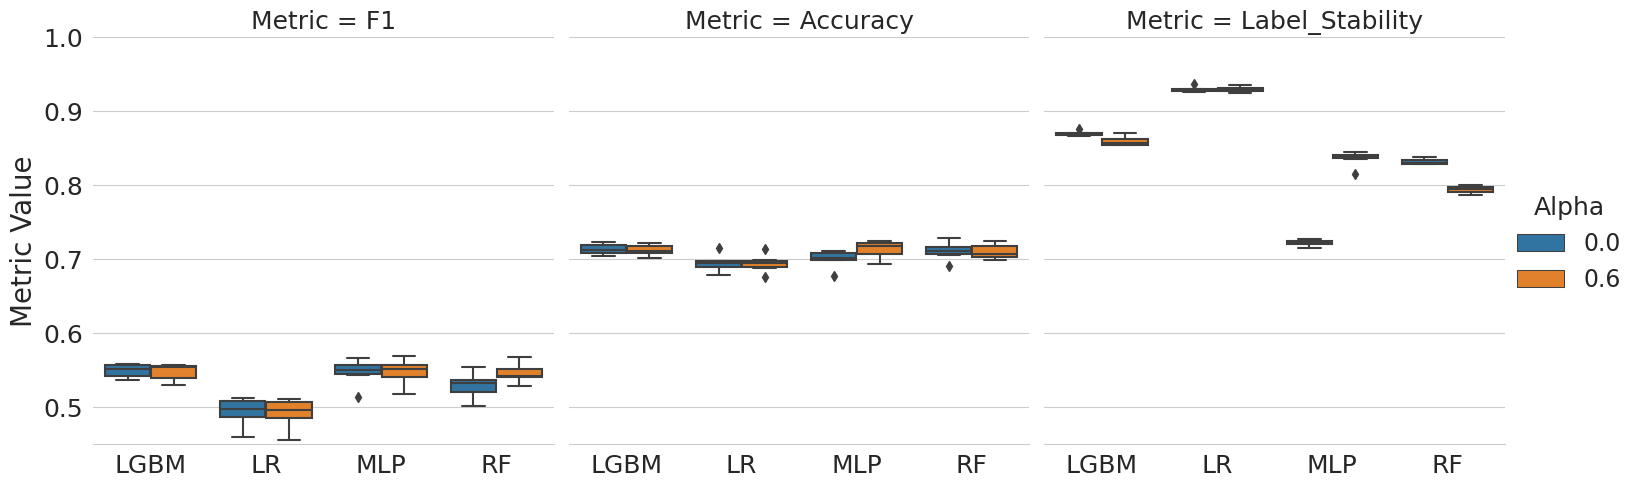

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.45, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

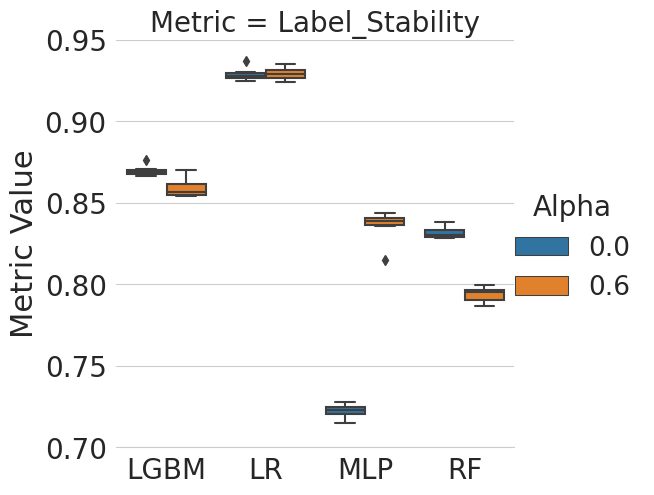

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.7, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

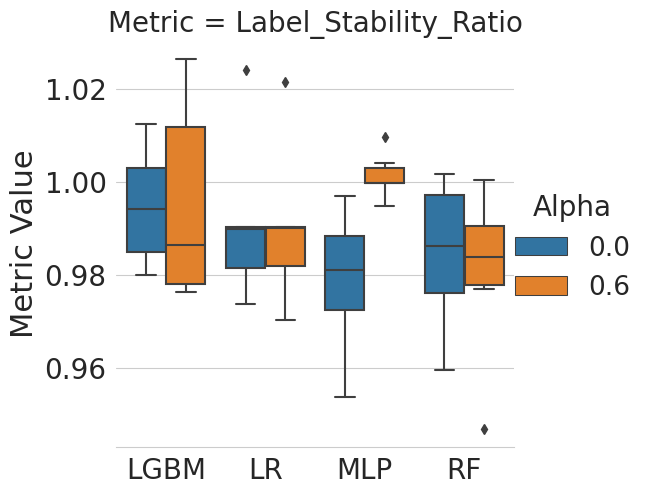

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

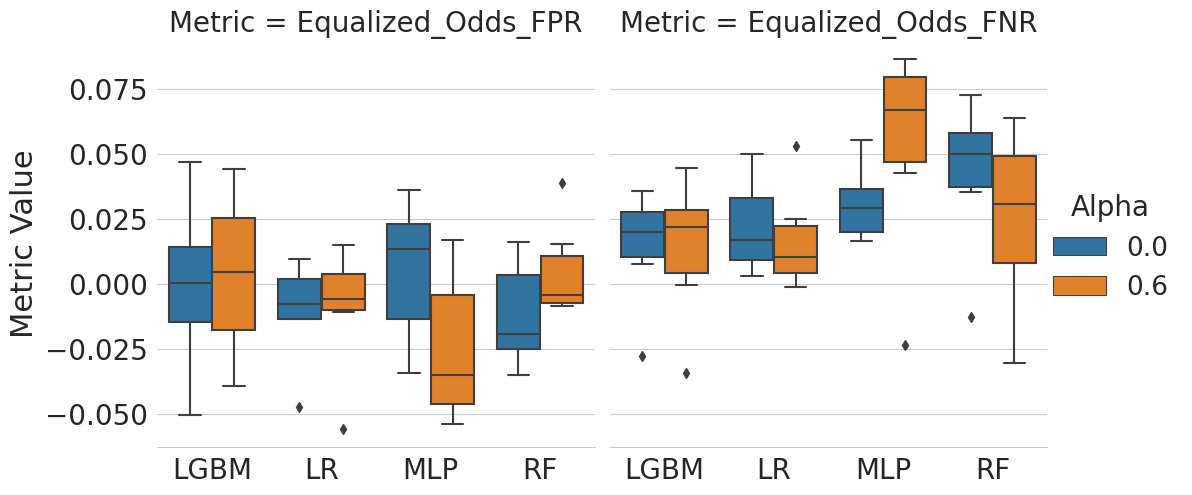

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [18]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'CA 2018',
    1: 'CA 2017',
    2: 'TX 2018',
    3: 'TX 2017',
}

<Figure size 1200x600 with 0 Axes>

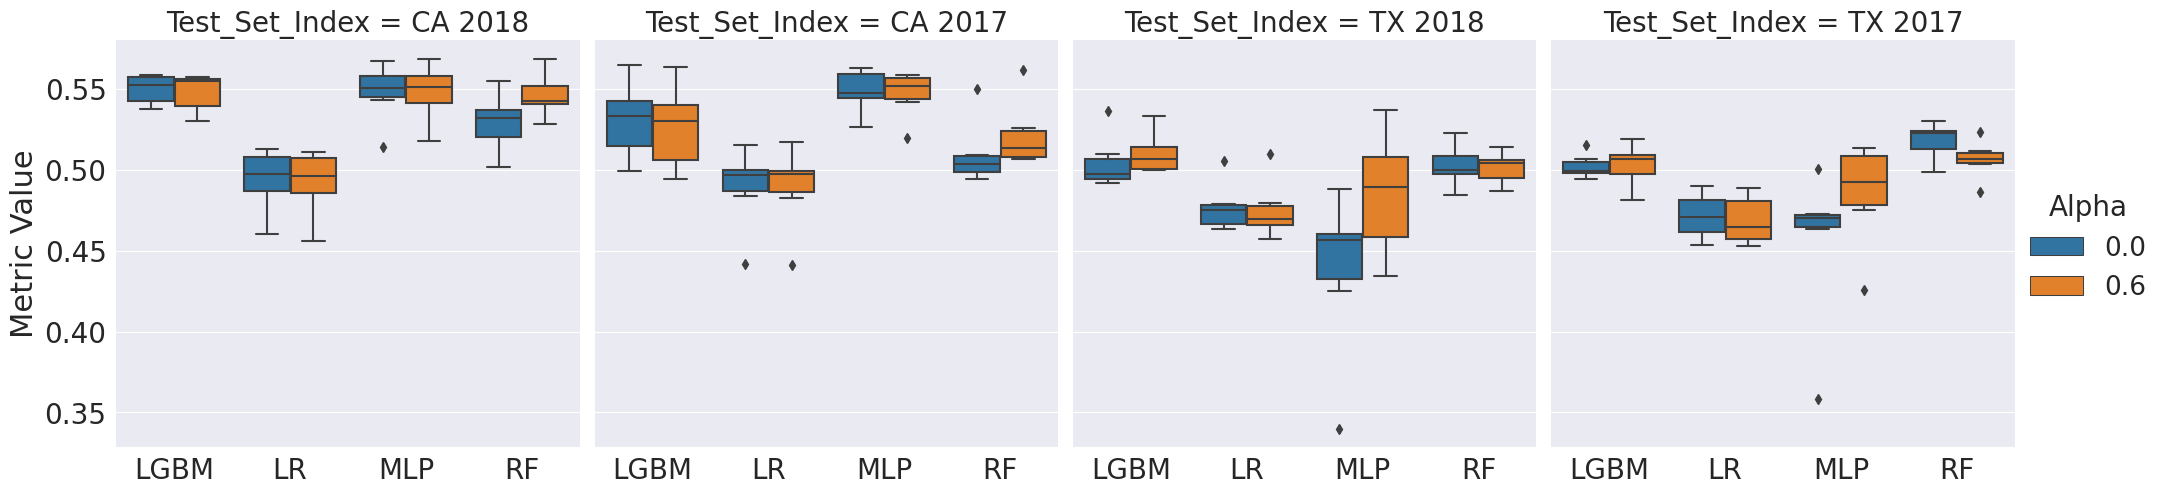

In [19]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

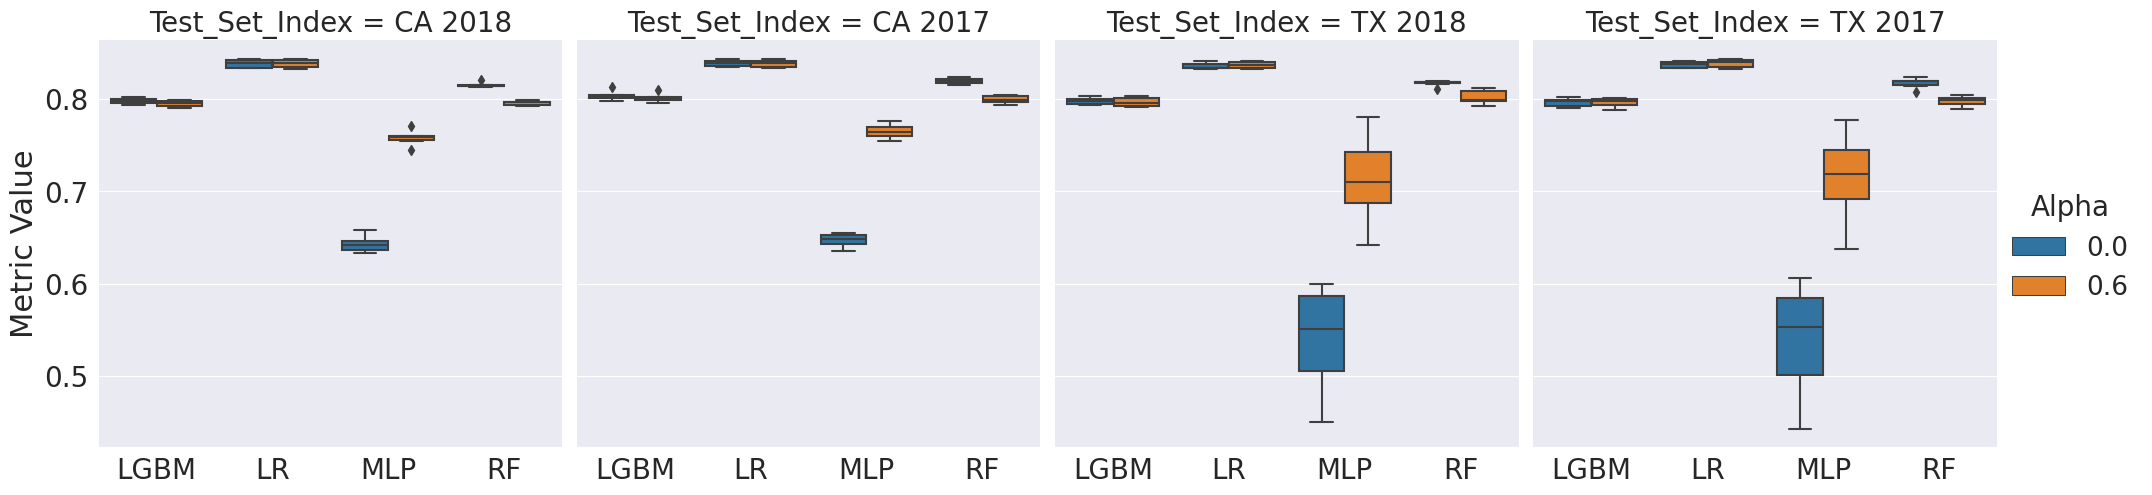

In [20]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

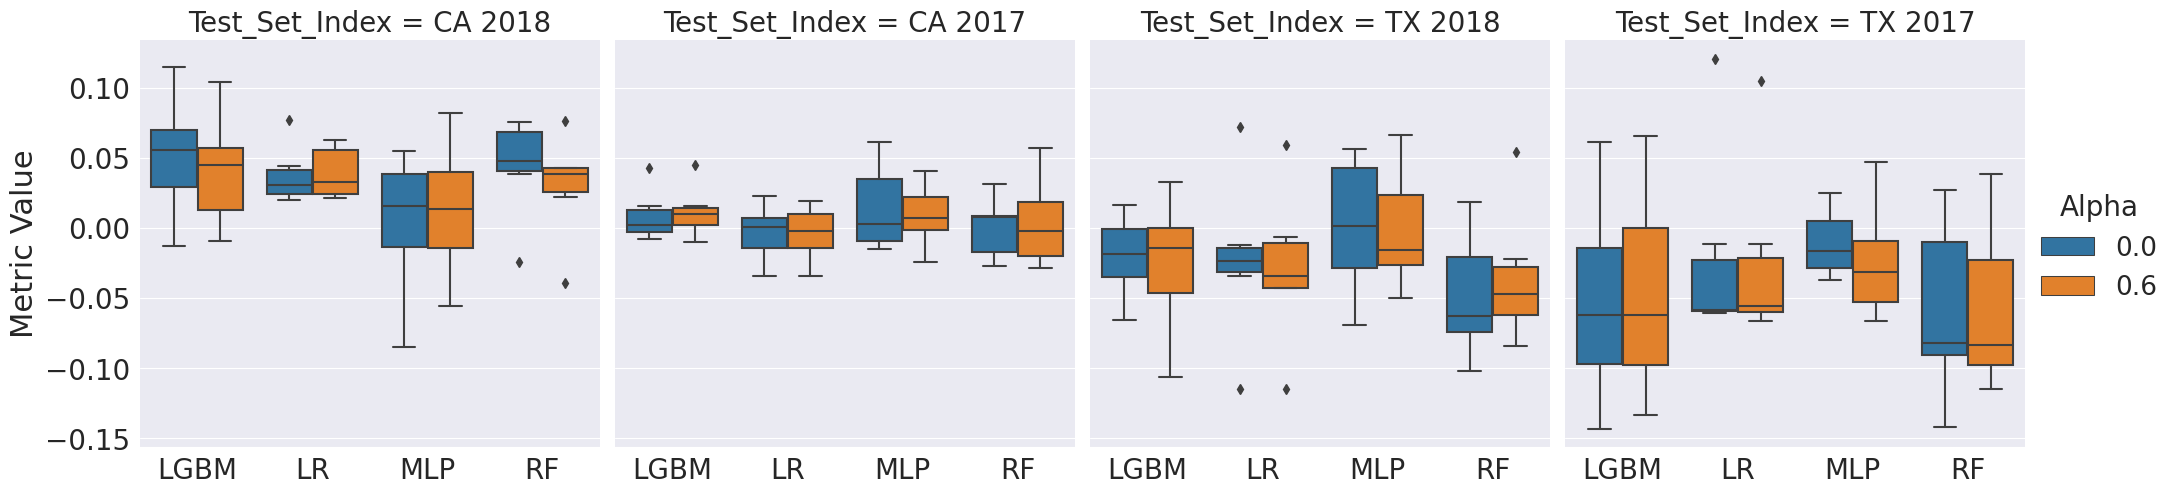

In [21]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

## Figure 3. Scatter plots.

In [22]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [23]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [24]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

## Figure 6. Responsible model selection

In [34]:
metrics_value_range_dct = {
    'Accuracy': [0.705, 0.73], # C1
    'Equalized_Odds_FPR': [-0.01, 0.01], # C2
    'Label_Stability': [0.85, 1.0], # C3
    'Label_Stability_Ratio': [0.97, 1.2], # C4
    'Accuracy&Equalized_Odds_FPR': None, # C1 + C2
    'Accuracy&Label_Stability': None, # C1 + C3
    'Accuracy&Label_Stability_Ratio': None, # C1 + C4
    'Accuracy&Equalized_Odds_FPR&Label_Stability&Label_Stability_Ratio': None, # C1 + C2 + C3 + C4
}
create_bar_plot_for_model_selection(melted_all_subgroup_metrics_per_model_dct,
                                    melted_all_group_metrics_per_model_dct,
                                    metrics_value_range_dct,
                                    group='SEX&RAC1P')

alt.Chart(...)